Testing `mushi` with `stdpopsim` simulations
==
- Plots using nextflow pipeline output in `output/` directory
- Using the zigzag $\eta$, and a $\boldsymbol\mu$ with two dynamic mutation types

In [1]:
import pickle
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D

mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"

## True histories
$\eta$ and $\boldsymbol\mu$ used in the simulation

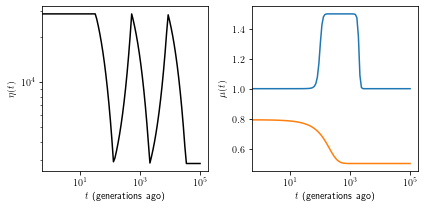

In [2]:
eta_true = pickle.load(open('output/histories/eta.pkl', 'rb'))
mu_true = pickle.load(open('output/histories/mu.pkl', 'rb'))

plt.figure(figsize=(6, 3))
plt.subplot(121)
eta_true.plot(c='k')
plt.subplot(122)
mu_true.plot(('TCC>TTC', 'GAA>GGA'))
plt.show()

## $\eta$ parameter sweep
Load inference results of parameter sweep over $\alpha_0$ and $\alpha_1$

In [16]:
heatmap_data = []
for i, f in enumerate(glob.glob('output/eta_sweep/*/dat*')):
    alpha_params, beta_params, ksfs = pickle.load(open(f, 'rb'))
    heatmap_data.append([alpha_params[0][1], alpha_params[1][1], ksfs.loss(), ksfs])

heatmap_data = np.array(heatmap_data)
heatmap_data = heatmap_data[np.lexsort(heatmap_data[:, 1::-1].T)]
# delta loss
heatmap_data[:, 2] = heatmap_data[:, 2] - heatmap_data[0, 2]

Plot 2D loss elbow heatmap, and inference results

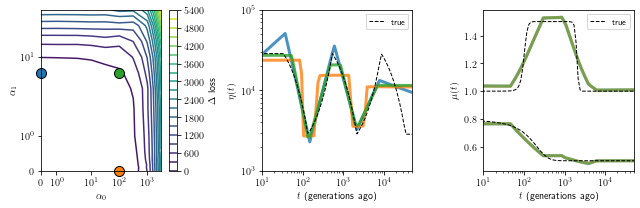

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

plt.sca(axes[0])
x = np.unique(heatmap_data[:, 0])
y = np.unique(heatmap_data[:, 1])
Z = heatmap_data[:, 2].reshape(len(x), len(y)).T
contour = plt.contour(x, y, Z, levels=20)
# heatmap = plt.contourf(contour)
#                        ,levels=[0, 150, 1000, Z.max()], colors=['c', 'm', 'y'])
cbar = fig.colorbar(contour)
cbar.ax.set_ylabel(r'$\Delta$ loss')
# Add the contour line levels to the colorbar
cbar.add_lines(contour)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'$\alpha_0$')
plt.ylabel(r'$\alpha_1$')

color_idx = 0

for i, data in enumerate(heatmap_data):
    alpha_0, alpha_1, relative_loss, ksfs = data

    if (alpha_0, alpha_1) in ((x[5], y[0]), (x[0], y[8]), (x[5], y[8])):
        
        # annotate point used for other sweep
        plt.sca(axes[0])
        plt.plot(alpha_0, alpha_1, marker='o', color=f'C{color_idx}', clip_on=False, markeredgecolor='k', ms=10)

        plt.sca(axes[1])
        ksfs.eta.plot(alpha=0.8, lw=3, color=f'C{color_idx}')

        plt.sca(axes[2])
        ksfs.mu.plot(('TCC>TTC', 'GAA>GGA'), alpha=0.5, lw=3, color=f'C{color_idx}')
    
        color_idx += 1

    
plt.sca(axes[1])
eta_true.plot(c='k', alpha=1, ls='--', lw=1, label='true', zorder=1000)
plt.legend(fontsize=8, loc='upper right')
plt.xlim([1e1, 5e4])
plt.ylim([1e3, 1e5])
                 
plt.sca(axes[2])
mu_true.plot(('TCC>TTC',), c='k', alpha=1, ls='--', lw=1, label='true', zorder=1000)
mu_true.plot(('GAA>GGA',), c='k', alpha=1, ls='--', lw=1, zorder=1000)
plt.legend(fontsize=8, loc='upper right')
plt.xlim([1e1, 5e4])

plt.tight_layout()
plt.savefig('plots/eta_sweep.pdf')

## $\boldsymbol\mu$ parameter sweep
Load inference results of parameter sweep over $\beta_0$ and $\beta_1$

In [18]:
heatmap_data = []
for i, f in enumerate(glob.glob('output/mu_sweep/*/dat*')):
    alpha_params, beta_params, ksfs = pickle.load(open(f, 'rb'))
#     if beta_params['beta_tv'] <= 3e3:# and beta_params['beta_spline'] <= 1e6:
    heatmap_data.append([beta_params[0][1], beta_params[1][1], ksfs.loss(), ksfs])

heatmap_data = np.array(heatmap_data)
heatmap_data = heatmap_data[np.lexsort(heatmap_data[:, 1::-1].T)]
# delta loss
heatmap_data[:, 2] = heatmap_data[:, 2] - heatmap_data[0, 2]

Plot 2D loss elbow heatmap, and inference results

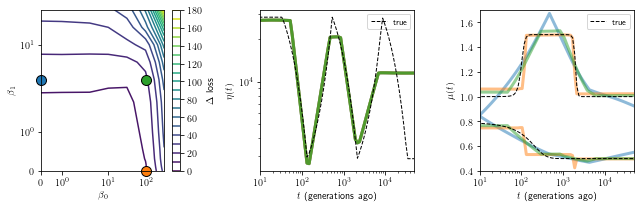

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

plt.sca(axes[0])
x = np.unique(heatmap_data[:, 0])
y = np.unique(heatmap_data[:, 1])
Z = heatmap_data[:, 2].reshape(len(x), len(y)).T
contour = plt.contour(x, y, Z, levels=20)
# heatmap = plt.contourf(contour, levels=[0, 300, 500, Z.max()], colors=['c', 'm', 'y'])
cbar = fig.colorbar(contour)
cbar.ax.set_ylabel(r'$\Delta$ loss')
# Add the contour line levels to the colorbar
cbar.add_lines(contour)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'$\beta_0$')
plt.ylabel(r'$\beta_1$')

color_idx = 0

for i, data in enumerate(heatmap_data):
    beta_0, beta_2, relative_loss, ksfs = data

    if (beta_0, beta_2) in ((x[5], y[0]), (x[0], y[7]), (x[5], y[7])):
        
        # annotate point used for other sweep
        plt.sca(axes[0])
        plt.plot(beta_0, beta_2, marker='o', color=f'C{color_idx}', clip_on=False, markeredgecolor='k', ms=10)

        plt.sca(axes[1])
        ksfs.eta.plot(alpha=0.8, lw=3, color=f'C{color_idx}')

        plt.sca(axes[2])
        ksfs.mu.plot(('TCC>TTC', 'GAA>GGA'), alpha=0.5, lw=3, color=f'C{color_idx}')
    
        color_idx += 1

    
plt.sca(axes[1])
eta_true.plot(c='k', alpha=1, ls='--', lw=1, label='true', zorder=1000)
plt.legend(fontsize=8, loc='upper right')
plt.xlim([1e1, 5e4])
                 
plt.sca(axes[2])
mu_true.plot(('TCC>TTC',), c='k', alpha=1, ls='--', lw=1, label='true', zorder=1000)
mu_true.plot(('GAA>GGA',), c='k', alpha=1, ls='--', lw=1, zorder=1000)
plt.legend(fontsize=8, loc='upper right')
plt.xlim([1e1, 5e4])
plt.ylim([0.4, 1.7])

plt.tight_layout()
plt.savefig('plots/mu_sweep.pdf')

## Point estimates
Make a tidy plot with the regularization parameters indicated by points in previous plots

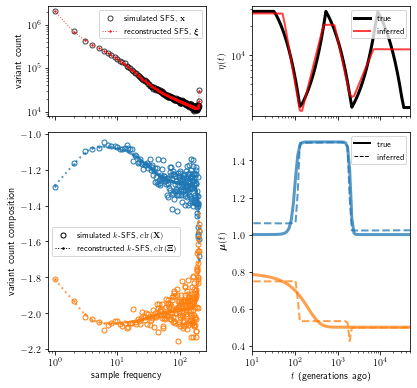

In [20]:
ksfs = pickle.load(open('output/mush/folded_False/dat.pkl', 'rb'))[2]

fig, axes = plt.subplots(nrows=2, ncols=2, sharex='col', figsize=(5.9, 5.5), gridspec_kw={'height_ratios': [1, 2]})

plt.sca(axes[0, 0])
ksfs.plot_total(kwargs=dict(ls='', alpha=0.75, marker='o', ms=5, mfc='none', c='k', label=r'simulated SFS, $\mathbf x$'),
                line_kwargs=dict(c='r', ls=':', marker='.', ms=3, alpha=0.75, lw=1, label=r'reconstructed SFS, $\boldsymbol{\xi}$'),
                fill_kwargs=dict(alpha=0))
plt.yscale('log')
plt.xlabel(None)
plt.legend(fontsize=8)

plt.sca(axes[1, 0])
ksfs.plot(('TCC>TTC',), clr=True, kwargs=dict(ls='', marker='o', ms=5, mfc='none', c='C0'),
          line_kwargs=dict(ls=':', marker='.', ms=3, alpha=0.75, lw=2, c='C0'))
ksfs.plot(('GAA>GGA',), clr=True, kwargs=dict(ls='', marker='o', ms=5, mfc='none', c='C1'),
          line_kwargs=dict(ls=':', marker='.', ms=3, alpha=0.75, lw=2, c='C1'))
plt.ylabel('variant count composition')
legend_elements = [Line2D([0], [0], ls='', marker='o', ms=5, mfc='none', color='k', label=r'simulated $k$-SFS, $\mathrm{clr}(\mathbf X)$'),
                   Line2D([0], [0], ls=':', marker='.', color='k', ms=3, lw=1, label=r'reconstructed $k$-SFS, $\mathrm{clr}(\boldsymbol\Xi)$')]
plt.legend(handles=legend_elements, fontsize=8)

plt.sca(axes[0, 1])
eta_true.plot(c='k', alpha=1, lw=3, label='true')
ksfs.eta.plot(c='r', alpha=0.75, lw=2, label='inferred')
plt.legend(fontsize=8, loc='upper right')
plt.xlabel(None)

plt.sca(axes[1, 1])
mu_true.plot(('TCC>TTC',), alpha=0.75, lw=3, c='C0')
ksfs.mu.plot(('TCC>TTC',), alpha=0.75, lw=2, c='C0', ls='--')
mu_true.plot(('GAA>GGA',), alpha=0.75, lw=3, c='C1')
ksfs.mu.plot(('GAA>GGA',), alpha=0.75, lw=2, c='C1', ls='--')
plt.ylabel(r'$\boldsymbol{\mu}(t)$')
legend_elements = [Line2D([0], [0], color='k', lw=2, label='true'),
                   Line2D([0], [0], color='k', ls='--', lw=1, label='inferred')]
plt.legend(handles=legend_elements, fontsize=8)
plt.xlim([1e1, 5e4])

plt.tight_layout()
plt.savefig('plots/mush.pdf')

## SFS folding


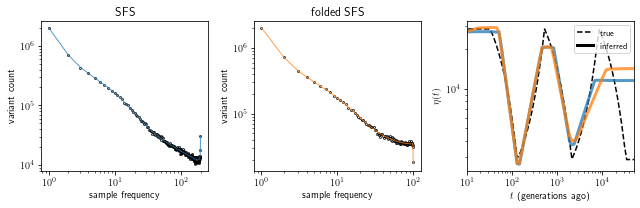

In [21]:
ksfs = pickle.load(open(f'output/mush/folded_False/dat.pkl', 'rb'))[2]
ksfs_folded = pickle.load(open(f'output/mush/folded_True/dat.pkl', 'rb'))[2]

# pickle loses jax types :(
import jax.numpy as jnp
ksfs.X = jnp.array(ksfs.X)
ksfs.L = jnp.array(ksfs.L)
ksfs_folded.X = jnp.array(ksfs_folded.X)
ksfs_folded.L = jnp.array(ksfs_folded.L)

plt.figure(figsize=(9, 3))

plt.subplot(131)
ksfs.plot_total(kwargs=dict(c='k', alpha=0.75, ls='', marker='o', ms=2, mfc='none', label='unfolded'),
                line_kwargs=dict(c='C0', alpha=0.75, lw=1),
                fill_kwargs=dict(alpha=0))
plt.xscale('log')
plt.yscale('log')
plt.title('SFS')

plt.subplot(132)
ksfs_folded.plot_total(folded=True,
                       kwargs=dict(c='k', alpha=0.75, ls='', marker='o', ms=2, mfc='none', label='folded'),
                       line_kwargs=dict(c='C1', alpha=0.75, lw=1),
                       fill_kwargs=dict(alpha=0))
plt.xscale('log')
plt.yscale('log')
plt.title('folded SFS')

plt.subplot(133)
eta_true.plot(c='k', ls='--', label='true')
ksfs.eta.plot(alpha=0.75, lw=3, label='inferred from SFS')
ksfs_folded.eta.plot(alpha=0.75, lw=3, label='inferred from folded SFS')
legend_elements = [Line2D([0], [0], c='k', ls='--', label='true'),
                   Line2D([0], [0], color='k', lw=3, label='inferred')]
plt.legend(handles=legend_elements, fontsize=8)
plt.xlim([1e1, 5e4])

plt.tight_layout()
plt.savefig(f'plots/mush_folded.pdf')